In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.sqrt(9216/  64)

12.0

In [2]:
import sys
sys.path.insert(0, '/home/ading/dev/empirical-mt')

import matplotlib.pyplot as plt

from pelic.gabors import makeGabors, makeGaussian
from pelic.calculate_contrast import CalculateContrast

import pandas as pd

from tqdm import tqdm 

from tuning import DirectionTuning, SpeedTuning, DisparityTuning

import numpy as np

from skimage import io
from skimage.color import rgb2gray, gray2rgb
from skimage.transform import resize
import skimage.draw as draw

import scipy.io as sio

import MT

from keras.layers import Input, Dense, Concatenate, Multiply
from keras.models import Model

size_ = 101
gabors = makeGabors(size_, center=None)
gaussian = makeGaussian(size_, sigma=5, center=None)

contrast_calculator = CalculateContrast(gabors, gaussian)

import tensorflow as tf

from os import listdir
from os.path import isfile, join, split, isdir, basename

Using TensorFlow backend.


In [3]:
df = pd.read_csv('../data/alov300++/alov300.csv')

In [6]:
np.array_split(df, 3)[0].head()

,video_path,category,ground_truth_path,size_x,size_y,size_z
0,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,720,1280,356
1,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,718,1280,114
2,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,718,1280,186
3,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,718,1280,120
4,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,1080,1920,360


In [3]:
df.head()

,video_path,category,ground_truth_path,size_x,size_y,size_z
0,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,720,1280,356
1,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,718,1280,114
2,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,718,1280,186
3,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,718,1280,120
4,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,1080,1920,360


In [21]:
g = pd.read_json('../data/alov300++/ground_truth/01-Light_video00001.ann')

In [23]:
len(g)

19

In [20]:
g.iloc[1]

v1    [167, 1088]
v2    [167, 1021]
v3    [249, 1021]
v4    [249, 1088]
Name: 11, dtype: object

In [1]:
df = pd.read_json('../data/alov300++/pairwise.json')

NameError: name 'pd' is not defined

In [37]:
df['f1_filepath']

0        input/ALOV300++/imagedata++/01-Light/01-Light_...
1        input/ALOV300++/imagedata++/01-Light/01-Light_...
2        input/ALOV300++/imagedata++/01-Light/01-Light_...
3        input/ALOV300++/imagedata++/01-Light/01-Light_...
4        input/ALOV300++/imagedata++/01-Light/01-Light_...
5        input/ALOV300++/imagedata++/01-Light/01-Light_...
6        input/ALOV300++/imagedata++/01-Light/01-Light_...
7        input/ALOV300++/imagedata++/01-Light/01-Light_...
8        input/ALOV300++/imagedata++/01-Light/01-Light_...
9        input/ALOV300++/imagedata++/01-Light/01-Light_...
10       input/ALOV300++/imagedata++/01-Light/01-Light_...
11       input/ALOV300++/imagedata++/01-Light/01-Light_...
12       input/ALOV300++/imagedata++/01-Light/01-Light_...
13       input/ALOV300++/imagedata++/01-Light/01-Light_...
14       input/ALOV300++/imagedata++/01-Light/01-Light_...
15       input/ALOV300++/imagedata++/01-Light/01-Light_...
16       input/ALOV300++/imagedata++/01-Light/01-Light_.

In [31]:
x = np.array([[1,2], [3,4]])

In [32]:
x.shape

(2, 2)

In [34]:
x.flatten()

array([1, 2, 3, 4])

In [ ]:
import multiprocessing as mp

l = [1, 2, 4, 4]

def f(x):
    return x + 1

pool = mp.Pool(4)

r = pool.map(f, l, chunksize=1)



In [13]:
df = pd.read_json('../data/alov300++/pairwise_size78_ratio0.3_grayscale/index.json')

In [15]:
df.head()

,feature_dir,frame_id,video_category,video_id
0,data/alov300++/pairwise_size78_ratio0.3_graysc...,6,light,01-Light_video00001
1,data/alov300++/pairwise_size78_ratio0.3_graysc...,11,light,01-Light_video00001
2,data/alov300++/pairwise_size78_ratio0.3_graysc...,16,light,01-Light_video00001
3,data/alov300++/pairwise_size78_ratio0.3_graysc...,21,light,01-Light_video00001
4,data/alov300++/pairwise_size78_ratio0.3_graysc...,26,light,01-Light_video00001


In [28]:
import os

c = np.load('../data/alov300++/pairwise_size78_ratio0.3_grayscale/13-ZoomingCamera_video00018/00000026/contrast.png.npy')

/home/ading/.local/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


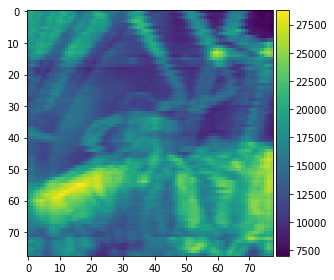

In [30]:
io.imshow(c)

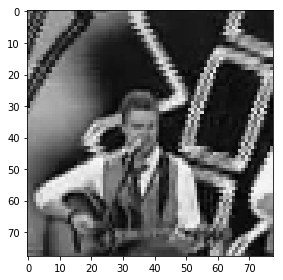

In [23]:
p  = '../data/alov300++/pairwise_size78_ratio0.3_grayscale/13-ZoomingCamera_video00018/00000026/'

img = io.imread('../data/alov300++/pairwise_size78_ratio0.3_grayscale/13-ZoomingCamera_video00018/00000026/frame.png')

io.imshow(img)

plt.show()

In [24]:
from os import path

op = sio.loadmat(path.join(p, 'optic_flow.mat'))

In [27]:
op['h_flow'].shape

(50, 50, 19)

TypeError: Invalid dimensions for image data

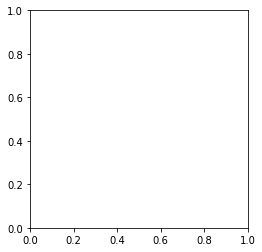

In [26]:
io.imshow(op['h_flow'])

plt.show()

In [35]:
import tensorflow as tf

x = tf.constant(3, dtype=tf.float32)
y = tf.constant(0, dtype=tf.float32)
z = x / y
a = tf.atan(z)

with tf.Session() as sess:
    r = sess.run(a)
    print(r)

1.5708


In [37]:
df = pd.read_csv('../data/alov300++/alov300.csv')

In [38]:
df.head()

,video_path,category,ground_truth_path,size_x,size_y,size_z
0,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,720,1280,356
1,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,718,1280,114
2,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,718,1280,186
3,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,718,1280,120
4,input/ALOV300++/imagedata++/01-Light/01-Light_...,light,input/ALOV300++/alov300++_rectangleAnnotation_...,1080,1920,360


In [39]:
from sklearn import model_selection

train, test = model_selection.train_test_split(df)


In [42]:
test.reset_index()

,index,video_path,category,ground_truth_path,size_x,size_y,size_z
0,184,input/ALOV300++/imagedata++/09-Confusion/09-Co...,confusion,input/ALOV300++/alov300++_rectangleAnnotation_...,240,320,83
1,277,input/ALOV300++/imagedata++/13-ZoomingCamera/1...,zoomingcamera,input/ALOV300++/alov300++_rectangleAnnotation_...,480,854,200
2,258,input/ALOV300++/imagedata++/12-MovingCamera/12...,movingcamera,input/ALOV300++/alov300++_rectangleAnnotation_...,1080,1906,144
3,112,input/ALOV300++/imagedata++/06-MotionSmoothnes...,motionsmoothness,input/ALOV300++/alov300++_rectangleAnnotation_...,1080,1920,305
4,246,input/ALOV300++/imagedata++/11-Occlusion/11-Oc...,occlusion,input/ALOV300++/alov300++_rectangleAnnotation_...,576,720,484
5,54,input/ALOV300++/imagedata++/03-Specularity/03-...,specularity,input/ALOV300++/alov300++_rectangleAnnotation_...,720,1280,145
6,183,input/ALOV300++/imagedata++/09-Confusion/09-Co...,confusion,input/ALOV300++/alov300++_rectangleAnnotation_...,404,720,459
7,88,input/ALOV300++/imagedata++/05-Shape/05-Shape_...,shape,input/ALOV300++/alov300++_rectangleAnnotation_...,360,480,240
8,103,input/ALOV300++/imagedata++/05-Shape/05-Shape_...,shape,input/ALOV300++/alov300++_rectangleAnnotation_...,720,1280,140
9,214,input/ALOV300++/imagedata++/10-LowContrast/10-...,lowcontrast,input/ALOV300++/alov300++_rectangleAnnotation_...,720,1280,358


In [23]:
from skimage import io, color, img_as_float32

In [26]:
f = io.imread('../input/ALOV300++/imagedata++/14-LongDuration/14-LongDuration_video00002/00000001.jpg')

In [27]:
f

array([[201, 201, 201, ...,  78,  72,  66],
       [201, 201, 201, ...,  69,  64,  62],
       [201, 201, 201, ...,  62,  60,  62],
       ..., 
       [ 99,  99,  99, ...,  68,  69,  69],
       [ 99,  99,  99, ...,  71,  71,  72],
       [ 99,  99,  99, ...,  74,  74,  74]], dtype=uint8)

In [24]:
f = color.gray2rgb(img_as_float32(f))

In [18]:
f.shape

(240, 640, 3)

In [47]:
import tensorflow as tf



ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

In [92]:
x - np.arange(0, 64)

array([[  0.,  -1.,  -2., ..., -61., -62., -63.],
       [  1.,   0.,  -1., ..., -60., -61., -62.],
       [  2.,   1.,   0., ..., -59., -60., -61.],
       ..., 
       [ 61.,  60.,  59., ...,   0.,  -1.,  -2.],
       [ 62.,  61.,  60., ...,   1.,   0.,  -1.],
       [ 63.,  62.,  61., ...,   2.,   1.,   0.]])

In [91]:
x.shape

(64, 64)

In [87]:
x = np.arange(0, 64, dtype='float32')

In [88]:
x = np.expand_dims(x,axis=1) 


In [89]:
 x = np.tile(x, [1,64])

In [32]:
np.arange(0, 3)

array([0, 1, 2])

In [ ]:
learning_rate * decay_rate ^ (global_step / decay_steps)

In [78]:
np.transpose(np.arange(0, 100))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [82]:
import tensorflow as tf

x = tf.range(0, 100)
x = tf.transpose(x)
print(x.shape)

with tf.Session() as sess:
    print(sess.run(x))

(100,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


In [1]:
t = np.arange(-5, 0, 0.001)

y = 0.0005 * np.power(0.99, np.divide(t, 20))



NameError: name 'np' is not defined

In [3]:
 np.exp(np.arange(0, 5, .45))


array([   1.        ,    1.56831219,    2.45960311,    3.85742553,
          6.04964746,    9.48773584,   14.87973172,   23.33606458,
         36.59823444,   57.39745705,   90.0171313 ,  141.17496392])

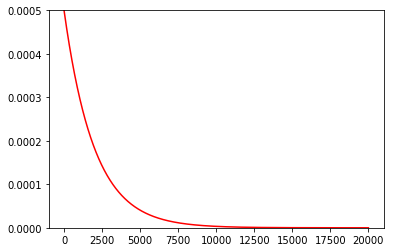

In [13]:
import matplotlib.pyplot as plt

plt.ylim(0, 0.0005)
plt.plot(t, y, color='r')

plt.show()

In [3]:
import tensorflow as tf

speed = np.abs(np.random.normal(0, 20, (76, 76)) + 1)

x = tf.constant(speed)

tent_basis = []

tent_centers = np.exp(np.arange(0, 5, .45))
                      
for i in range(0, len(tent_centers) - 2):
    _left = tent_centers[i]
    _center = tent_centers[i + 1]
    _right = tent_centers[i + 2]

    x = speed * 4
    y_left = (x - _left) / (_center - _left)
    y_right = (_right - x) / (_right - _center)

    y = tf.where((x >= _left) & (x <= _center), y_left, tf.zeros_like(x)) \
        + tf.where((x >= _center) & (x <= _right), y_right, tf.zeros_like(x))

    tent_basis.append(y)

tent_basis = tf.stack(tent_basis, axis=2)



In [4]:

with tf.Session() as sess:
    tents = sess.run(tent_basis)

(array([ 49203.,    919.,    954.,    935.,    900.,    902.,    943.,
          1011.,    996.,    997.]),
 array([ 0.        ,  0.09999292,  0.19998583,  0.29997875,  0.39997167,
         0.49996458,  0.5999575 ,  0.69995042,  0.79994333,  0.89993625,
         0.99992917]),
 <a list of 10 Patch objects>)

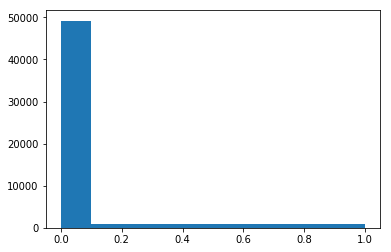

In [9]:
plt.hist(tents.flatten())

In [56]:

def tent(x,centre_indx=0):
    centres =  np.exp(np.arange(0,5,.45))
    centre = centres[centre_indx+1]
    begin_ = centres[centre_indx]# - 16#np.log(centre-.4)
    end_ = centres[centre_indx+2] #+ 16#np.log(centre+.4)
    y = np.zeros(x.shape)    
    #print('x.shape',x.shape)
    y[(x>=begin_)&(x<=centre)] = (x[(x>=begin_)&(x<=centre)]-begin_)/(centre-begin_)
    y[(x>=centre)&(x<=end_)]   = (end_-x[(x>=centre)&(x<=end_)])/(end_-centre)    


    return y

def get_tent_responses(flow_speed,n_tent, unit_conv):

    speed_deg_per_second = unit_conv * flow_speed 
    speed_tent_response = np.zeros((76, 76, 10))

    for i in range(n_tent): 
        speed_tent_response[:,:,i] = tent(speed_deg_per_second,centre_indx=i)
    return speed_tent_response 

omid = get_tent_responses(speed, 10, 4)

In [12]:
import os
from glob import glob

path = '../input/ALOV300++'

result = [y for x in os.walk(path) for y in glob(os.path.join(x[0], '*.jpg'))]

In [18]:
list(os.walk(path))

[('../input/ALOV300++',
  ['alov300++_rectangleAnnotation_full', 'imagedata++'],
  ['alov300++GT_txtFiles.zip']),
 ('../input/ALOV300++/alov300++_rectangleAnnotation_full',
  ['04-Transparency',
   '12-MovingCamera',
   '06-MotionSmoothness',
   '03-Specularity',
   '14-LongDuration',
   '10-LowContrast',
   '13-ZoomingCamera',
   '02-SurfaceCover',
   '08-Clutter',
   '11-Occlusion',
   '07-MotionCoherence',
   '09-Confusion',
   '01-Light',
   '05-Shape'],
  []),
 ('../input/ALOV300++/alov300++_rectangleAnnotation_full/04-Transparency',
  [],
  ['04-Transparency_video00019.ann',
   '04-Transparency_video00012.ann',
   '04-Transparency_video00014.ann',
   '04-Transparency_video00015.ann',
   '04-Transparency_video00011.ann',
   '04-Transparency_video00020.ann',
   '04-Transparency_video00013.ann',
   '04-Transparency_video00001.ann',
   '04-Transparency_video00018.ann',
   '04-Transparency_video00016.ann',
   '04-Transparency_video00005.ann',
   '04-Transparency_video00010.ann',
   '0

In [15]:
[y.replace('imagedata++', 'saliencymaps') for y in result]

['../input/ALOV300++/saliencymaps/04-Transparency/04-Transparency_video00001/00000148.jpg',
 '../input/ALOV300++/saliencymaps/04-Transparency/04-Transparency_video00001/00000214.jpg',
 '../input/ALOV300++/saliencymaps/04-Transparency/04-Transparency_video00001/00000145.jpg',
 '../input/ALOV300++/saliencymaps/04-Transparency/04-Transparency_video00001/00000235.jpg',
 '../input/ALOV300++/saliencymaps/04-Transparency/04-Transparency_video00001/00000002.jpg',
 '../input/ALOV300++/saliencymaps/04-Transparency/04-Transparency_video00001/00000026.jpg',
 '../input/ALOV300++/saliencymaps/04-Transparency/04-Transparency_video00001/00000143.jpg',
 '../input/ALOV300++/saliencymaps/04-Transparency/04-Transparency_video00001/00000075.jpg',
 '../input/ALOV300++/saliencymaps/04-Transparency/04-Transparency_video00001/00000015.jpg',
 '../input/ALOV300++/saliencymaps/04-Transparency/04-Transparency_video00001/00000222.jpg',
 '../input/ALOV300++/saliencymaps/04-Transparency/04-Transparency_video00001/000

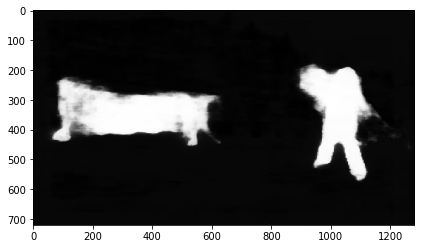

In [20]:
from skimage import color, io

p = '/home/ading/dev/empirical-mt/input/ALOV300++/saliencymaps/01-Light/01-Light_video00001/00000001.jpg'

p = io.imread(p)

io.imshow(p)

In [24]:
gain = np.load('../attention_gains.npy', dtype=)

In [3]:
import tensorflow as tf

dummy = tf.tile([[0, 1, 2]])
selector = tf.constant([2, 0, 1])

with tf.Session() as sess:
    sess.run(x * y)

ValueError: Dimensions must be equal, but are 2 and 3 for 'mul' (op: 'Mul') with input shapes: [2,3], [3,4].